# La serie trigonométrica de Fourier.

Sea $x(t)$ una señal periódica, es decir que se puede expresar como $x(t)=x(t+T)$, donde $T$ es el periódo de dicha señal en segundos. Según lo descubierto por Joseph Fourier ({cite:t}`KamenMATLAB`), una señal periódica se puede representar como la sumatoria de una infinidad de términos seno y coseno, usando la siguiente expresión:


```{math}
:label: serie_fourier
\begin{equation}
   x(t)=a_0+\sum^{\infty}_{k=1}\left[a_kcos(k\omega_0t)+b_ksen(k\omega_0t)\right],~~-\infty<t<\infty
 \end{equation}
```
donde $\omega_0=\frac{2\pi}{T}$ y los términos $a_0$, $a_k$ y $b_k$ se calculan como

```{math}
:label: a0
\begin{equation}
a_0=\frac{1}{T}\int^{T}_{0}x(t)dt
\end{equation}
```

```{math}
:label: ak
\begin{equation}
a_k=\frac{2}{T}\int^{T}_{0}x(t)cos(k\omega_0t)dt
\end{equation}
```

```{math}
:label: bk
\begin{equation}
b_k=\frac{2}{T}\int^{T}_{0}x(t)sen(k\omega_0t)dt
\end{equation}
```
## Ejemplo 1, señal diente de sierra.

Considere la señal tipo diente de sierra, definida por la expresión:

```{math}
:label: func_sierra
\begin{equation}
         g(t)= \left\{ \begin{array}{lcc} 150(t+0.02) & si & -0.02 \leq t \leq -0.01 \\ \\ 150t & si & -0.01 \leq t \leq 0.01 \\ \\ 150(t-0.02) & si & 0.01 < t \leq 0.03 \end{array} \right.
		 \end{equation}
```
Además, se cumple que $g(t)=g(t+0.02)$. La gráfica de esta señal, definida por la {eq}`func_sierra` se muestra con las líneas de código siguientes:

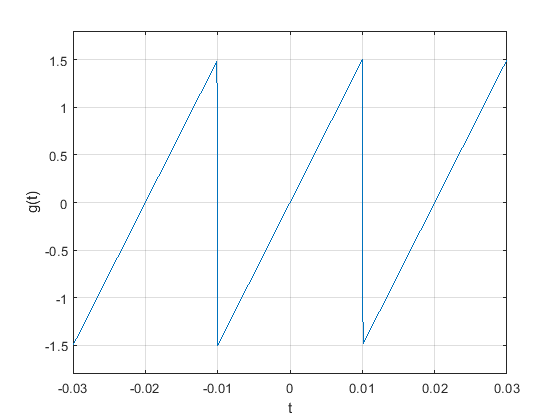

In [11]:
clear
close all
clc

t=[-0.03:0.0001:0.03];
g=(150*(t+0.02)).*((t>=-0.03)&(t<-0.01))+(150*t).*((t>-0.01)&(t<=0.01))+...
   +(150*(t-0.02)).*((t>0.01)&(t<=0.03));

plot(t,g);
xlabel("t");
ylabel("g(t)")
axis([-0.03 0.03 -1.8 1.8]) %La istrucción axis ajusta los ejes de la gráfica
grid;


Los coeficientes $a_0$, $a_k$ y $b_k$ para la serie trigonométrica de Fourier de la señal diente de sierra, definida por la ecuacion {eq}`func_sierra` se calculan usando las ecuaciones {eq}`a0`, {eq}`ak` y {eq}`bk`. Dado que $T=0.02$ y $\omega_0=100\pi$:

```{math}
\begin{equation}\nonumber
a_0=\frac{1}{T}\int^{T}_{0}x(t)dt=\frac{1}{T}\int^{\frac{T}{2}}_{-\frac{T}{2}}x(t)dt=\frac{1}{0.02}\int^{-0.01}_{0.01}150tdt=7500\left[{\frac{t^2}{2}}_{t=-0.01}^{t=0.01}\right]=0
\label{a0sierra}
\end{equation}
```

```{math}
\begin{equation}\nonumber
a_k=15000\left[{\frac{tsen(100k\pi t)}{100k\pi}}_{t=-0.01}^{t=0.01}-\int^{0.01}_{-0.01}\frac{sen(100k\pi t)}{100k\pi}dt\right]
\end{equation}
``` 
dado que se cumple que $sen(-x)=-sen(x)$ y $cos(-x)=cos(x)$:

```{math}
\begin{equation}\nonumber
a_k=15000\left[\frac{cos(100k\pi(0.01))}{\left(100k\pi\right)^2}-\frac{cos(100k\pi(-0.01))}{\left(100k\pi\right)^2}\right]=0
\end{equation}
```

Para los coeficientes $b_k$ se expresa:

```{math}
\begin{equation}\nonumber
b_k=\frac{2}{T}\int^{T}_{0}x(t)sen(k\omega_0t)dt=\frac{2}{0.02}\int^{0.01}_{-0.01}150tsen(k\omega_0t)dt
\end{equation}
```

```{math}
\begin{equation}\nonumber
b_k=-\frac{3}{k\pi}\left[cos(k\pi)\right],k=1,2,3...
\end{equation}
```

El código de MATLAB que permite calcular la serie trigonométrica de Fourier de la función diente de sierra, considerando los primeros 15 términos de la serie, es decir, con $n=15$ es el siguiente

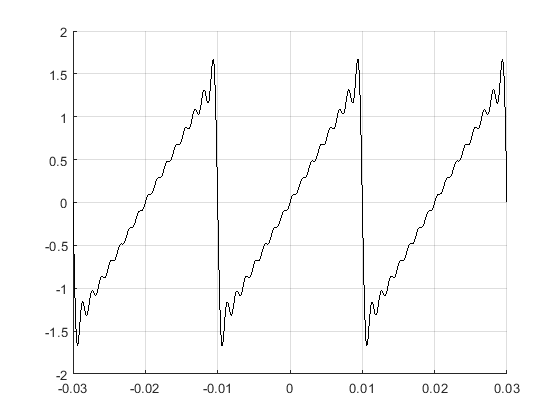

In [2]:

n = 15;   
figure
hold on 

x_t =0*t;

for k = 1:n
     bn = -3/(k*pi)*(cos(k*pi));
     x_t = x_t + bn*sin(100*k*pi*t);
end

plot(t,x_t,'k'),grid

Para comparar $g(t)$ con su aproximación usando la serie trigonométrica de Fourier se unas las instrucciones siguientes:

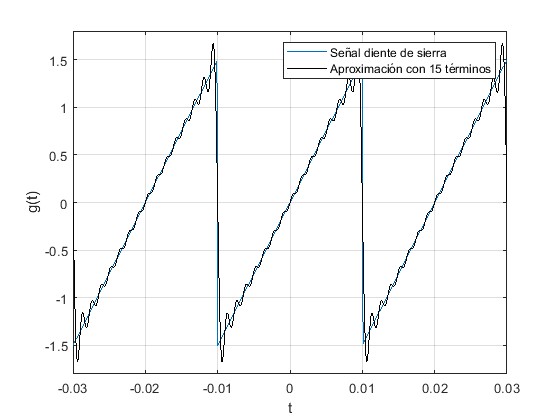

In [3]:
figure
plot(t,g);
xlabel("t");
ylabel("g(t)")
axis([-0.03 0.03 -1.8 1.8]) %La istrucción axis ajusta los ejes de la gráfica
grid;
hold on
plot(t,x_t,'k')
legend("Señal diente de sierra","Aproximación con 15 términos")

Entre más términos se consideren de la aproximación, es decir, entre mayor sea n en el programa, más parecida será la aproximación, por ejemplo, con $n=100$:

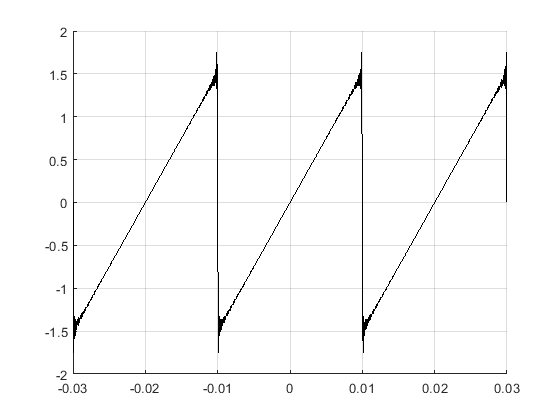

In [4]:
n = 100;   
figure
hold on 

x_t =0*t;

for k = 1:n
     bk = -3/(k*pi)*(cos(k*pi));
     x_t = x_t + bk*sin(100*k*pi*t);
end

plot(t,x_t,'k')

grid

A la distorción en las siscontinuidades o cambios en la señal se le conoce como fenómeno de Gibbs {cite:t}`KamenMATLAB`.

## Ejemplo 2, pulso cuadrado. 

Cosidere una función tipo pulso cuadrado, definida por la ecuación:

```{math}
:label: func_pulso
\begin{equation}
         g(t)= \left\{ \begin{array}{lcc} 5 & si & -0.5 \leq t \leq 0.5 \\ \\ 0 & si & 0.5 \leq t \leq 1.5  \end{array} \right.
		 \end{equation}
```




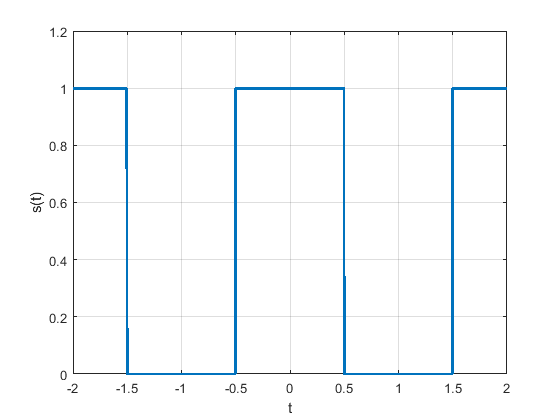

In [5]:
clear
close all
clc

t=[-2:0.0001:2];
s=1*((t>=-2)&(t<=-1.5))+1*((t>-0.5)&(t<=0.5))+1*((t>1.5)&(t<=2));

plot(t,s,"linewidth",2);
xlabel("t");
ylabel("s(t)")
axis([-2 2 0 1.2]) %La istrucción axis ajusta los ejes de la gráfica
grid;

La aproximación por medio de la serie trigonométrica de Fourier se obtiene usando las ecuaciones {eq}`a0` a {eq}`bk` y considerando que $\omega_0=\frac{2\pi}{T}=\frac{2\pi}{2}=\pi$

$$
\begin{equation}\nonumber
a_0=\frac{1}{T}\int^{T}_{0}x(t)dt=\frac{1}{2}\int^{2}_{0}x(t)dt=\frac{1}{2}\int^{0.5}_{0}(1)dt+\frac{1}{2}\int^{1.5}_{0.5}(0)dt+\frac{1}{2}\int^{2}_{1.5}(1)dt=\frac{1}{2}
\end{equation}
$$

$$
\begin{equation}\nonumber
a_k=\frac{2}{T}\int^{T}_{0}x(t)cos(k\omega_0t)dt=\frac{2}{2}\int^{2}_{0}x(t)cos(k\omega_0t)dt=\int^{0.5}_{0}cos(k\omega_0t)dt+\int^{1}_{1.5}cos(k\omega_0t)dt
\end{equation}
$$

$$
\begin{equation}\nonumber
a_k=\int^{0.5}_{0}cos(k\omega_0t)dt+\int^{1}_{1.5}cos(k\omega_0t)dt={\frac{1}{\pi k}sen(k\pi t)}_{t=0}^{t=0.5}+{\frac{1}{\pi k}sen(k\pi t)}_{t=1.5}^{t=2}
\end{equation}
$$

$$
\begin{equation}\nonumber
a_k=\frac{1}{k\pi}\left[sen\left(\frac{k\pi}{2}\right)-sen\left(\frac{3k\pi}{2}\right)\right]=\frac{2}{k\pi}sen\left(\frac{k\pi}{2}\right),k=1,2,3...
\end{equation}
$$

Para los coeficientes $b_k$ se expresa:

$$
\begin{equation}\nonumber
b_k=\frac{2}{T}\int^{T}_{0}x(t)sen(k\omega_0t)dt=\frac{2}{2}\int^{2}_{0}x(t)sen(k\omega_0t)dt=\int^{0.5}_{0}sen(k\omega_0t)dt+\int^{1}_{1.5}sen(k\omega_0t)dt
\end{equation}
$$

$$
\begin{equation}\nonumber
b_k=\int^{0.5}_{0}sen(k\omega_0t)dt+\int^{1}_{1.5}sen(k\omega_0t)dt={\frac{-1}{\pi k}cos(k\pi t)}_{t=0}^{t=0.5}+{\frac{-1}{\pi k}cos(k\pi t)}_{t=1.5}^{t=2}
\end{equation}
$$

$$
\begin{equation}\nonumber
b_k=\frac{-1}{k\pi}\left[-1+1\right]=0,~~~k=1,2,3...
\end{equation}
$$

La aproximación por medio de la serie trigonométrica de Fourier se obtiene usando las ecuaciones {eq}`a0` a {eq}`bk` y considerando que $\omega_0=\frac{2\pi}{T}=\frac{2\pi}{0.2}=10\pi$, como se muestra en la figura generada en MATLAB como sigue:

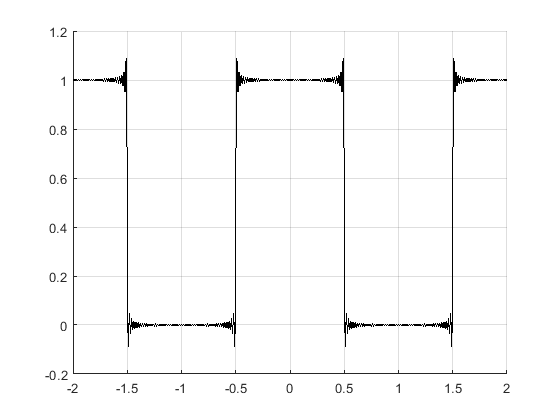

In [6]:
n = 100;   
figure
hold on 

x_t =0*t+0.5;

for k = 1:n
     ak = 2/(k*pi)*sin(k*pi/2);
     x_t = x_t +ak*cos(k*pi*t);
end

plot(t,x_t,'k'),grid

## Ejemplo 3, señal modulada por ancho de pulso.

Considere ahora una señal modulada por ancho de pulso definida por la expresión:


```{math}
:label: func_pwm
\begin{equation}
         g(t)= \left\{ \begin{array}{lcc} 5 & si & -1.5 \leq t \leq 0.5 \\ \\ 0 & si & 0.2 \leq t \leq 0.25  \end{array} \right.
		 \end{equation}
```

$g(t)=g(t+0.2)$


La aproximación por medio de la serie trigonométrica de Fourier se obtiene usando las ecuaciones {eq}`a0` a {eq}`bk` y considerando que $\omega_0=\frac{2\pi}{T}=\frac{2\pi}{0.2}=10\pi$, como se muestra en la figura generada en MATLAB como sigue:

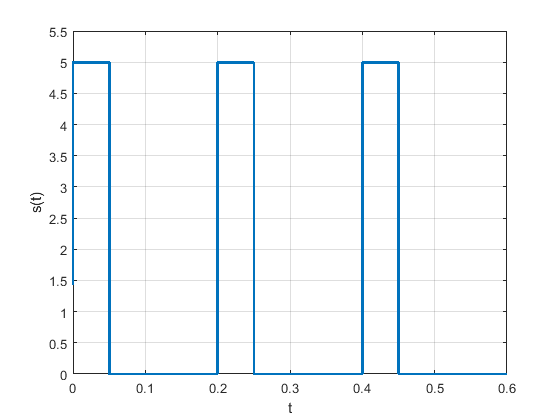

In [7]:
clear
close all
clc

t=[-0.03:0.0001:0.6];
s=5*((t>=0)&(t<=0.05))+5*((t>0.2)&(t<=0.25))+5*((t>0.4)&(t<=0.45));

plot(t,s,"linewidth",2);
xlabel("t");
ylabel("s(t)")
axis([0 0.6 0 5.5]) %La istrucción axis ajusta los ejes de la gráfica
grid;

Los coficientes de la serie trigonométrica de fourier para la aproximación de la señal $s(t)$ se calculan usando las ecuaciones {eq}`a0`, {eq}`ak` y {eq}`bk` para obtener:

$$
\begin{equation}
a_0=\frac{1}{T}\int^{T}_{0}x(t)dt=\frac{1}{0.2}\int^{0.2}_{0}x(t)dt=5\int^{0.05}_{0}5dt=25 \left [ t_{t=0}^{t=0.05}\right ]=1.25
\end{equation}
$$

$$
\begin{equation}
a_k=\frac{2}{T}\int^{T}_{0}x(t)cos(k\omega_0t)dt=\frac{1}{0.2}\int^{0.05}_{0}5cos(k\omega_0t)dt
\end{equation}
$$

$$
\begin{equation}\nonumber
a_k=50 \left [ \frac{sen(10k\pi t)}{10k\pi}_{t=0}^{t=0.05} \right ]=\frac{5}{k\pi}sen\left( \frac{k\pi}{2}t\right ),~~~k=1,2,3...
\end{equation}
$$



Para los coeficientes $b_k$ se expresa:

$$
\begin{equation}\nonumber
b_k=\frac{2}{T}\int^{T}_{0}x(t)sen(k\omega_0t)dt=\frac{10}{0.2}\int^{0.05}_{0}sen(k\omega_0t)dt
\end{equation}
$$

$$
\begin{equation}\nonumber
b_k=5\left[{\frac{-cos(10k\pi t)}{10k\pi}}_{t=0}^{t=0.05}\right]
\end{equation}
$$


$$
\begin{equation}\nonumber
b_k=\frac{5}{k\pi}\left[1-cos\left ( \frac{k\pi}{2}t \right )\right],k=1,2,3...
\end{equation}
$$

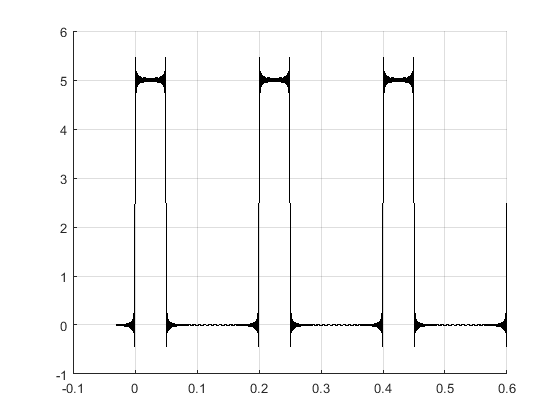

In [8]:
n = 100;   
figure
hold on 

x_t =0*t+1.25;

for k = 1:n
     ak = 5/(k*pi)*sin(k*pi/2);
     bk = 5/(k*pi)*(1-cos(k*pi/2));
     x_t = x_t +ak*cos(10*k*pi*t)+bk*sin(10*k*pi*t);
end

plot(t,x_t,'k'),grid